In [25]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

import sys
import os
import matplotlib.pyplot as plt

sys.path.append('../')
sys.path.append('../paretoviz')
from paretoviz import plotting as pplt
from paretoviz import decorator as dcor
from paretoviz.utils import fmt
from paretoviz.utils import vectorops as vops
from paretoviz.decorator import Arrow3D

# Do all these plots with centroid based coloring

# rawfpath = "../data/spherical/spherical-3d.out"
# rawfpath = "../data/spherical/spherical-4d.out"
# rawfpath = "../data/spherical/spherical-8d.out"

# rawfpath = "../data/knee/knee-3d.out"
# rawfpath = "../data/knee/knee-4d.out"
# rawfpath = "../data/knee/knee-8d.out"

# rawfpath = "../data/line-surface/line-3d.out"
rawfpath = "../data/line-surface/line-4d.out"
# rawfpath = "../data/line-surface/line-6d.out"
# rawfpath = "../data/line-surface/line-8d.out"

# rawfpath = "../data/carcrash/carcrash-3d.out"
# rawfpath = "../data/carcrash/carcrash-c1/carcrash-c1-3d.out"
# rawfpath = "../data/carcrash/carcrash-c2/carcrash-c2-3d.out"

# Do all these plots with constraint based coloring

# rawfpath = "../data/knee-const/knee-const-3d.out"
# rawfpath = "../data/knee-const/knee-const-4d.out"
# rawfpath = "../data/knee-const/knee-const-8d.out"

# rawfpath = "../data/knee-const-mod/knee-const-mod-3d.out"
# rawfpath = "../data/knee-const-mod/knee-const-mod-4d.out"

# rawfpath = "../data/isolated/isolated-3d.out"
# rawfpath = "../data/isolated/isolated-4d.out"
# rawfpath = "../data/isolated/isolated-8d.out"

# rawfpath = "../data/c2dtlz2/c2dtlz2-3d.out"
# rawfpath = "../data/c2dtlz2/c2dtlz2-4d.out"
# rawfpath = "../data/c2dtlz2/c2dtlz2-5d.out"
# rawfpath = "../data/c2dtlz2/c2dtlz2-8d.out"

# rawfpath = "../data/c2dtlz2/c2dtlz2-c1/c2dtlz2-c1-3d.out"
# rawfpath = "../data/c2dtlz2/c2dtlz2-c2/c2dtlz2-c2-3d.out"
# rawfpath = "../data/c2dtlz2/c2dtlz2-c3/c2dtlz2-c3-3d.out"
# rawfpath = "../data/c2dtlz2/c2dtlz2-c4/c2dtlz2-c4-3d.out"

# rawfpath = "../data/gaa-das/gaa-das-10d.out"
# rawfpath = "../data/gaa-lhs/gaa-lhs-10d.out"

# some ML data sets
# rawfpath = "../data/airofoil/airofoil-5d.out"
# rawfpath = "../data/banknote/banknote-4d.out"
# rawfpath = "../data/blood/blood-4d.out"
# rawfpath = "../data/cccp/cccp-4d.out"
# rawfpath = "../data/concrete/concrete-8d.out"
# rawfpath = "../data/iris/iris-4d.out"
# rawfpath = "../data/mammogram/mammogram-5d.out"
# rawfpath = "../data/wil/wil-7d.out"
# rawfpath = "../data/yeast/yeast-8d.out"

# do visualization based on distance from the centroid?
docentroid = False

# get the path and filename from the rawfpath
path, rawfile = os.path.split(rawfpath)
# get the prefix
prefix = rawfile.split('.')[0]

# load the normalized points
points = fmt.load(os.path.join(path, prefix + "-norm.out"))

# load the CV values
cvfpath = os.path.join(path, prefix + "-cv.out")
if not docentroid and os.path.exists(cvfpath):
    cv = [v[0] if len(v) == 1 else v for v in fmt.load(cvfpath)]
    [low, up] = vops.get_bound(cv)
    cv = vops.normalize(cv, low, up)
    color = dcor.recolor_by_cv(cv)
else:
    color = dcor.recolor_by_centroid(points)

# load the normalized trade-off values
mufpath = os.path.join(path, prefix + "-norm-mu.out")
knee_idx = None
if os.path.exists(mufpath):
    mu = [v[0] if len(v) == 1 else v for v in fmt.load(mufpath)]
    # resize the points w.r.t. trade-offs
    size = dcor.rescale_by_tradeoff(mu)
    (color, knee_idx) = dcor.recolor_by_tradeoff(size, color)

# load the class labels
classfpath = os.path.join(path, prefix + "-class.out")
if os.path.exists(classfpath):
    labels = [v[0] if len(v) == 1 else v for v in \
            fmt.load(classfpath, dtype = dcor.dtypes[prefix])]
    color = dcor.recolor_by_labels(labels, dtype = dcor.dtypes[prefix])
    size = [5.0 for _ in range(len(points))]

# alpha values
alpha = [0.2, 0.8] # alpha for plots with knee
# alpha = [1.0, 1.0] # alpha for general case

<IPython.core.display.Javascript object>


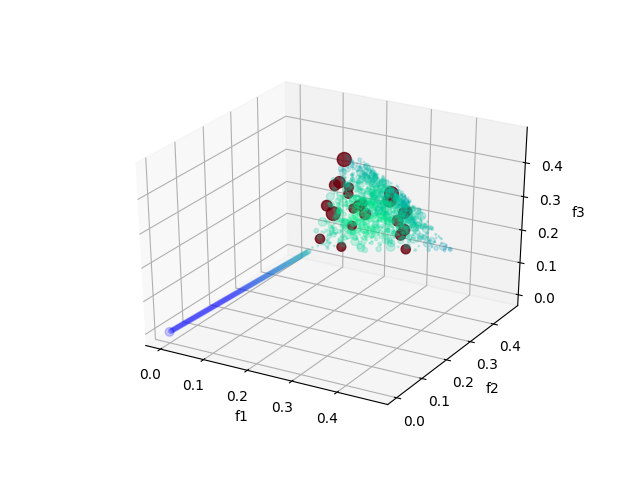

In [40]:
# use the original obj values for scatter plot.
rawpoints = fmt.load(rawfpath)
# do the scatter plot
(fig, ax) = pplt.scatter(rawpoints, s = size, c = color, alpha = alpha, \
                camera = dcor.cam_scatter[prefix], knee_idx = knee_idx)
# save the scatter plot
scatterfpath = os.path.join(".", prefix + "-scatter.pdf")
plt.savefig(scatterfpath, transparent = False)

plt.show()

<IPython.core.display.Javascript object>


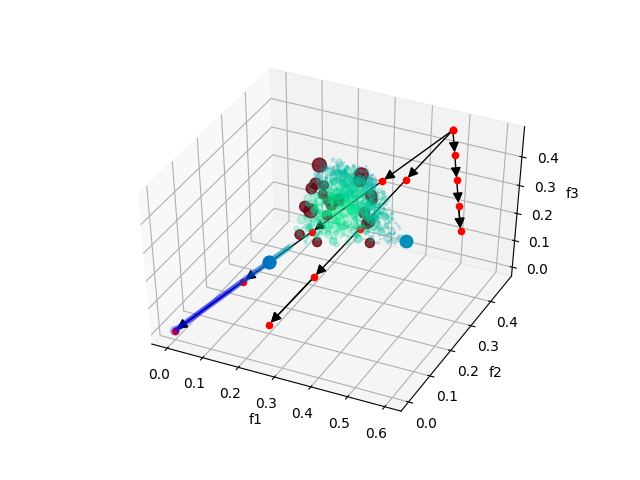

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [41]:
import math
import numpy as np

# function for computing asf
def asf(z, f, z_nad = None, z_utop = None, rho = 0.0001):
    m = len(f)
    s = 0.0
    for i in range(m):
        s = s + f[i] / (z_nad[i] - z_utop[i])
    zdist = float('-inf')
    for i in range(m):
        d = (f[i] - z[i]) / (z_nad[i] - z_utop[i])
        if d >= zdist:
            zdist = d
    return zdist + (rho * s)

def minimize_asf(F, z, z_nad = None, z_utop = None, rho = 0.0001):
    fv = []
    for i,f in enumerate(F):
        fv.append([i, asf(z, f, z_nad = z_nad, z_utop = z_utop, rho = rho)])
    fv.sort(key = lambda x: x[1])
    return fv[0][0]

# find the ideal and nadir points
bounds = []
[lb, ub] = vops.get_bound(rawpoints)
bounds.append([lb, ub])
if len(rawpoints[0]) == 3:
    [lb, ub] = [[0.4, 0.4, 0.0], ub]
    bounds.append([lb, ub])
    [lb, ub] = [[0.6, 0.3, 0.0], ub]
    bounds.append([lb, ub])
elif len(rawpoints[0]) == 4:
    [lb, ub] = [[0.2, 0.1, 0.0, 0.0], ub]
    bounds.append([lb, ub])
    [lb, ub] = [[0.6, 0.3, 0.3, 0.0], ub]
    bounds.append([lb, ub])    

# Now do a scatter plot
(fig, ax) = pplt.scatter(rawpoints, s = size, c = color, alpha = alpha, \
                camera = dcor.cam_scatter[prefix], knee_idx = knee_idx)
found = []
for [lb, ub] in bounds:
    d = vops.distlp(ub, lb)
    v = vops.sub(ub, lb)
    u = vops.unit(v)

    ratio = [0.0, 0.25, 0.5, 0.75, 1.0]
    z = [vops.sub(ub, vops.mult(d * r, u)) for r in ratio]

    for i in range(len(z) - 1):
        plt.scatter(z[i][0], z[i][1], zs = z[i][2], c = 'red', s = 20.0)
        # Draw the path
        a = Arrow3D([z[i][0], z[i+1][0]], [z[i][1], z[i+1][1]], [z[i][2], z[i+1][2]], \
                    mutation_scale = 15, lw = 1, arrowstyle = "-|>", color = "black")
        ax.add_artist(a)
    # last arrow
    plt.scatter(z[-1][0], z[-1][1], zs = z[-1][2], c = 'red', s = 20.0)
    # Draw the path
    a = Arrow3D([z[-2][0], z[-1][0]], [z[-2][1], z[-1][1]], [z[-2][2], z[-1][2]], \
                mutation_scale = 15, lw = 1, arrowstyle = "-|>", color = "black")
    ax.add_artist(a)


    i = minimize_asf(rawpoints, z[2], z_nad = ub, z_utop = lb)
    # print(i)
    found.append(i)
    plt.scatter(rawpoints[i][0], rawpoints[i][1], zs = rawpoints[i][2], \
                c = color[i], s = 80.0)
    # print(color[i])

    # # # save the scatter plot
    scatterfpath = os.path.join(".", prefix + "-scatter-path.pdf")
    plt.savefig(scatterfpath, transparent = False)
    
plt.show()

<IPython.core.display.Javascript object>


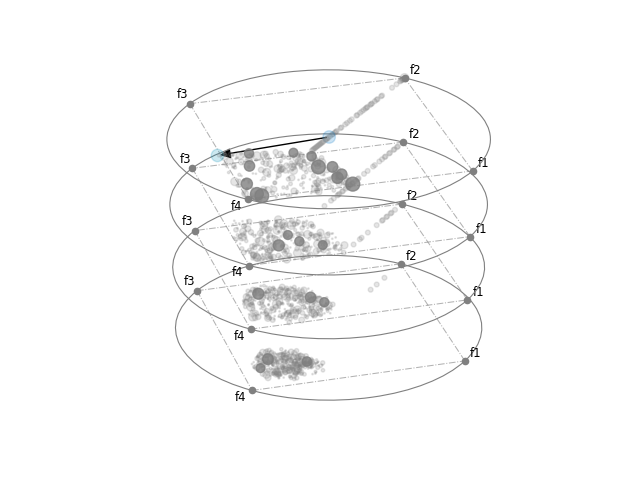

In [42]:
# Show the generic paletteviz
palette_coords = fmt.load(os.path.join(path, prefix + "-norm-palette-invsc.out"))

color_pr = []
size_pr = []
for i in range(len(color)):
    if i not in found:
        color_pr.append('grey')
        size_pr.append(size[i])
    else:
        color_pr.append(color[i])
        size_pr.append(80.0)

# do the paletteviz plot
(fig, ax) = pplt.paletteviz(palette_coords, dim = len(points[0]), \
            s = size_pr, c = color_pr, alpha = alpha, camera = dcor.cam_palette[prefix], \
            knee_idx = knee_idx, mode = "sc")

for i in range(len(found) - 1):
    from_ = palette_coords[found[i]]
    to_ = palette_coords[found[i+1]]
    a = Arrow3D([from_[0], to_[0]], [from_[1], to_[1]], [from_[2], to_[2]], \
                mutation_scale = 15, lw = 1, arrowstyle = "-|>", color = "black")
    ax.add_artist(a)

# save the paletteviz plot
fig.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, wspace = 0, hspace = 0)
palettefpath = os.path.join(".", prefix + "-norm-palette-invsc-path.pdf")
plt.savefig(palettefpath, transparent = False, bbox_inches = 'tight', pad_inches = 0)

plt.show()

In [29]:
s = [1, 2, 3, 4]
print(s[0:1])

[1]
